# The dataset

### Load and Visualize Data

The first step in working with any dataset is to become familiar with our data.


In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Training and Testing Data

We will use the [Toxic Comment Classification Challenge dataset](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) which have been labeled by human raters for toxic behavior.

The types of toxicity are:

- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

#### Train.csv - the training set, contains comments with their binary labels

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_train.shape

(159571, 8)

In [3]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# example of clean comment
df_train.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [5]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# example of toxic comment
df_train[df_train.toxic == 1].iloc[1, 1]

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

#### Test.csv - the test set contains some comments which are not included in scoring

In [7]:
df_test = pd.read_csv('datasets/test.csv')
df_test.shape

(153164, 2)

In [8]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


#### The training data contains 159,571 observations with 8 columns and the test data contains 153,164 observations with 2 columns.

### Further exploratory 

<AxesSubplot:xlabel='comment_text', ylabel='Count'>

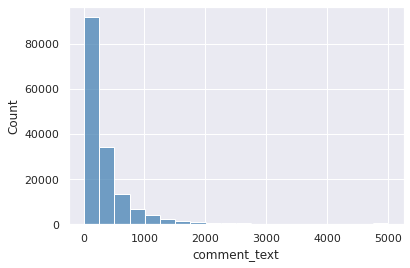

In [9]:
sns.set(color_codes=True)
comment_len = df_train.comment_text.str.len()
sns.histplot(comment_len, kde=False, bins=20, color="steelblue")

Below is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words.

In [10]:
train_labels = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] #target_columns 
label_count = train_labels.sum()

<AxesSubplot:title={'center':'Labels Frequency'}>

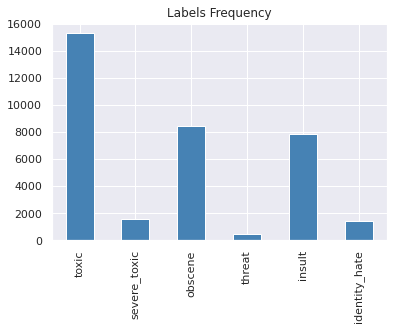

In [11]:
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

<AxesSubplot:>

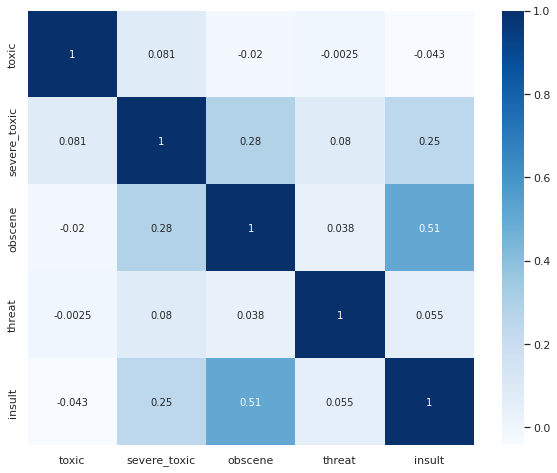

In [12]:
# Cross correlation matrix across labels
rowsums = df_train.iloc[:, 2:].sum(axis=1)
temp = df_train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

As seen in the cross-correlation matrix, there is a high chance of **obscene** comments to be **insulting**